# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"

print(url)


http://api.openweathermap.org/data/2.5/weather?units=metric&appid=99be0c481d7cdbbc80a11c3c1dd64dec


In [5]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | arlit
Processing Record 3 of Set 1 | vostok
Processing Record 4 of Set 1 | sept-iles
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | garoua
Processing Record 7 of Set 1 | yerbogachen
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | zabaykalsk
Processing Record 14 of Set 1 | lavrentiya
Processing Record 15 of Set 1 | namatanai
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | port alfred
Processing Record 19 of Set 1 | sao filipe
Processing Record 20 of Set 1 | atar
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of 

Processing Record 38 of Set 4 | uruzgan
Processing Record 39 of Set 4 | kungurtug
Processing Record 40 of Set 4 | rairangpur
Processing Record 41 of Set 4 | hesla
Processing Record 42 of Set 4 | saint-pierre
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | abu samrah
Processing Record 45 of Set 4 | disna
Processing Record 46 of Set 4 | aldan
Processing Record 47 of Set 4 | panzhihua
Processing Record 48 of Set 4 | usakos
Processing Record 49 of Set 4 | amderma
City not found. Skipping...
Processing Record 0 of Set 5 | ponta do sol
Processing Record 1 of Set 5 | okato
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 4 of Set 5 | battle creek
Processing Record 5 of Set 5 | fortuna
Processing Record 6 of Set 5 | mahebourg
Processing Record 7 of Set 5 | bagan
Processing Record 8 of Set 5 | bayburt
Processing Record 9 of Set 5 | ferme-neuve
Processing Record 10

Processing Record 27 of Set 8 | berlevag
Processing Record 28 of Set 8 | moron
Processing Record 29 of Set 8 | lewisporte
Processing Record 30 of Set 8 | kasangulu
Processing Record 31 of Set 8 | aykhal
Processing Record 32 of Set 8 | veraval
Processing Record 33 of Set 8 | sembe
Processing Record 34 of Set 8 | port augusta
Processing Record 35 of Set 8 | vaitape
Processing Record 36 of Set 8 | sorvag
City not found. Skipping...
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | kollumerland
City not found. Skipping...
Processing Record 39 of Set 8 | dwarka
Processing Record 40 of Set 8 | bonavista
Processing Record 41 of Set 8 | leningradskiy
Processing Record 42 of Set 8 | yara
Processing Record 43 of Set 8 | lerwick
Processing Record 44 of Set 8 | inyonga
Processing Record 45 of Set 8 | hazorasp
Processing Record 46 of Set 8 | raudeberg
Processing Record 47 of Set 8 | roebourne
Processing Record 48 of Set 8 | bilibino
Processing Record 49 of Set 8 | aklavik
Pro

Processing Record 11 of Set 12 | gamba
Processing Record 12 of Set 12 | rakoshyno
Processing Record 13 of Set 12 | baoning
Processing Record 14 of Set 12 | san policarpo
Processing Record 15 of Set 12 | daru
Processing Record 16 of Set 12 | storslett
Processing Record 17 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 18 of Set 12 | bolivar
Processing Record 19 of Set 12 | ayolas
Processing Record 20 of Set 12 | ivanivka
Processing Record 21 of Set 12 | chitral
Processing Record 22 of Set 12 | lompoc
Processing Record 23 of Set 12 | yeppoon
Processing Record 24 of Set 12 | hilton head island
Processing Record 25 of Set 12 | balkanabat
Processing Record 26 of Set 12 | imaculada
Processing Record 27 of Set 12 | konstantinovo
Processing Record 28 of Set 12 | olafsvik
Processing Record 29 of Set 12 | bujumbura
Processing Record 30 of Set 12 | calama
Processing Record 31 of Set 12 | champasak
Processing Record 32 of Set 12 | vila
Processing Record 33 of Set 12 | gwadar
P

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,25.86,78,13,6.68,PF,1675812610
1,arlit,18.7369,7.3853,22.68,15,100,1.91,NE,1675813102
2,vostok,46.4856,135.8833,-16.14,91,100,2.39,RU,1675813014
3,sept-iles,50.2001,-66.3821,-6.00,83,75,7.20,CA,1675813103
4,rikitea,-23.1203,-134.9692,26.44,70,84,5.01,PF,1675812836


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.86,78,13,6.68,PF,1675812610
1,arlit,18.7369,7.3853,22.68,15,100,1.91,NE,1675813102
2,vostok,46.4856,135.8833,-16.14,91,100,2.39,RU,1675813014
3,sept-iles,50.2001,-66.3821,-6.00,83,75,7.20,CA,1675813103
4,rikitea,-23.1203,-134.9692,26.44,70,84,5.01,PF,1675812836


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

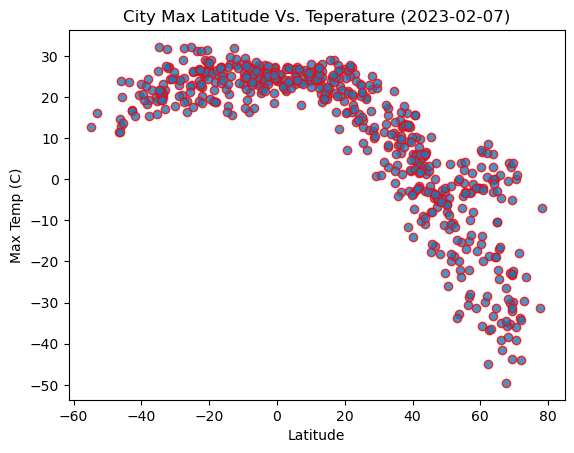

In [10]:
import time

# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="red",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    )


# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude Vs. Teperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (C)")
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

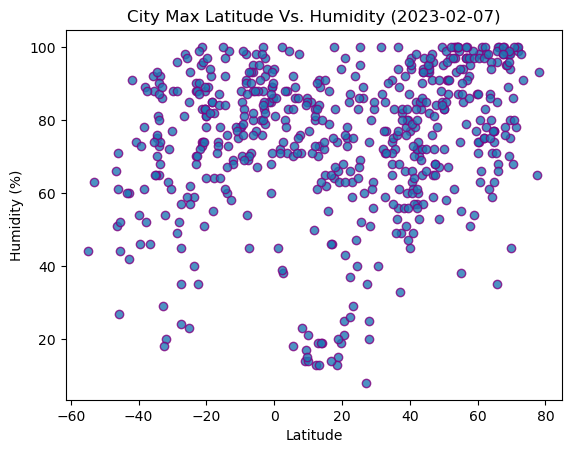

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="purple",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
    )

# Incorporate the other graph properties
date = time.strftime("%Y-%m-%d")
plt.title(f"City Max Latitude Vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

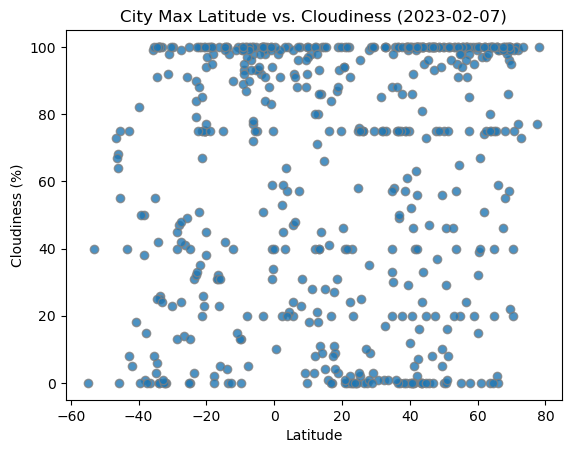

In [14]:
# Build the scatter plots for latitude vs. cloudiness
import time

plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="grey",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")   
plt.title(f"City Max Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

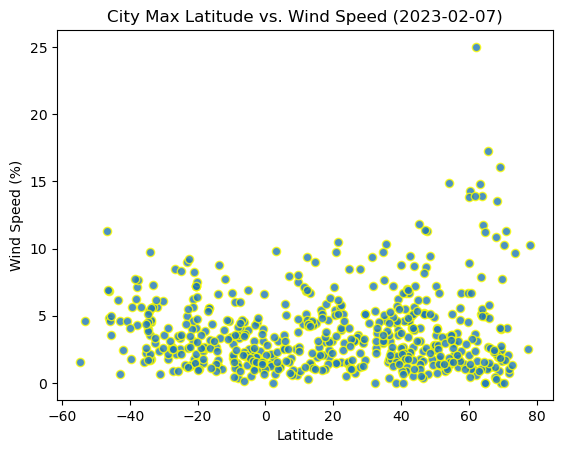

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="yellow",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities")

# Incorporate the other graph properties

date = time.strftime("%Y-%m-%d")   
plt.title(f"City Max Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [30]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_value, y_value, title, text_coord):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
    regress_value = x_value * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    
    plt.scatter(x_value, y_value)
    plt.plot(x_value, regress_value, "r-")
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    plt.xlabel("Lat")
    plt.ylabel(title)
    print(f" The r-value is {rvalue ** 2}")
    plt.show()
    
    
    
    

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,arlit,18.7369,7.3853,22.68,15,100,1.91,NE,1675813102
2,vostok,46.4856,135.8833,-16.14,91,100,2.39,RU,1675813014
3,sept-iles,50.2001,-66.3821,-6.00,83,75,7.20,CA,1675813103
5,garoua,9.3000,13.4000,24.59,17,88,0.59,CM,1675813103
6,yerbogachen,61.2767,108.0108,-29.89,100,97,1.05,RU,1675813108


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] <0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atuona,-9.8000,-139.0333,25.86,78,13,6.68,PF,1675812610
4,rikitea,-23.1203,-134.9692,26.44,70,84,5.01,PF,1675812836
7,cape town,-33.9258,18.4232,21.32,73,0,9.77,ZA,1675812665
8,arraial do cabo,-22.9661,-42.0278,23.98,90,90,1.20,BR,1675812902
13,namatanai,-3.6667,152.4333,27.73,76,100,2.38,PG,1675813112


###  Temperature vs. Latitude Linear Regression Plot

 The r-value is 0.7334798794351053


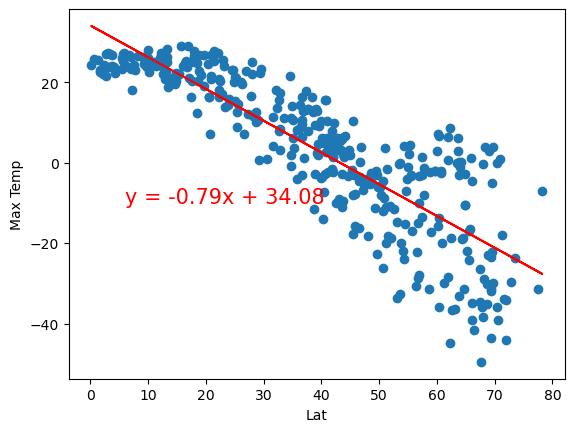

In [31]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (6, -10))

 The r-value is 0.18144194038955855


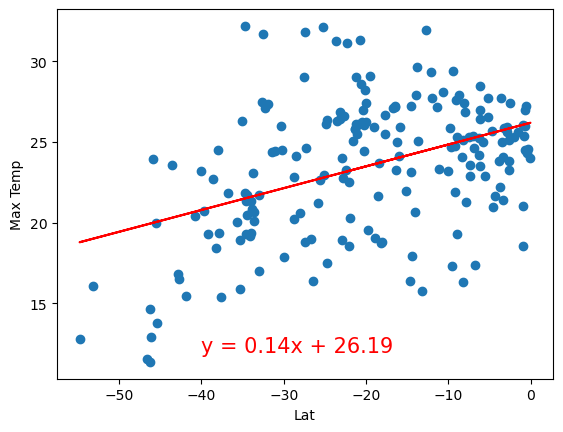

In [46]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Max Temp", (-40, 12))



**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 The r-value is 0.15067911373285825


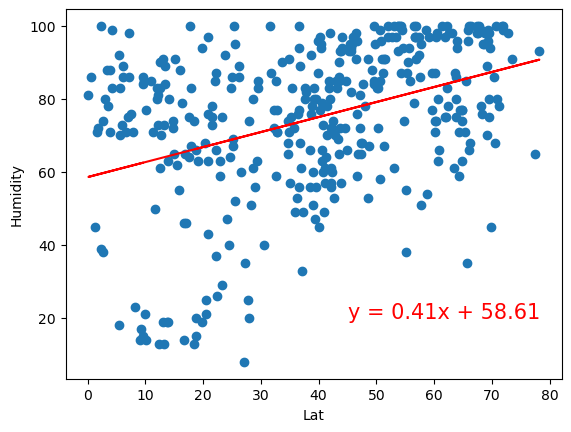

In [43]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (45, 20))

 The r-value is 0.17749011503344927


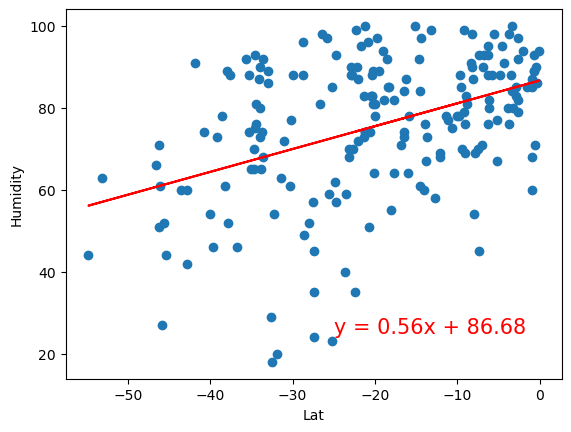

In [49]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity", (-25, 25))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 The r-value is 0.049438043243848755


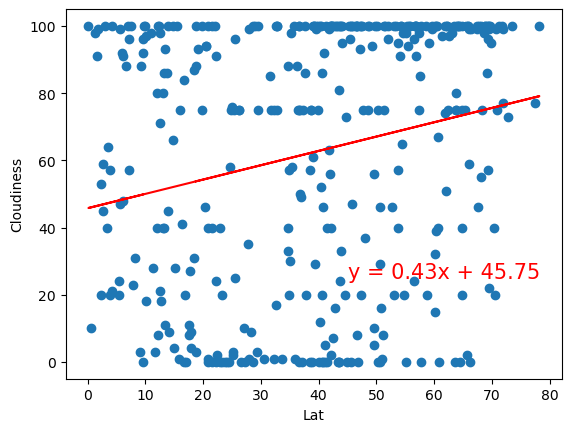

In [51]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (45, 25))

 The r-value is 0.14770642173462475


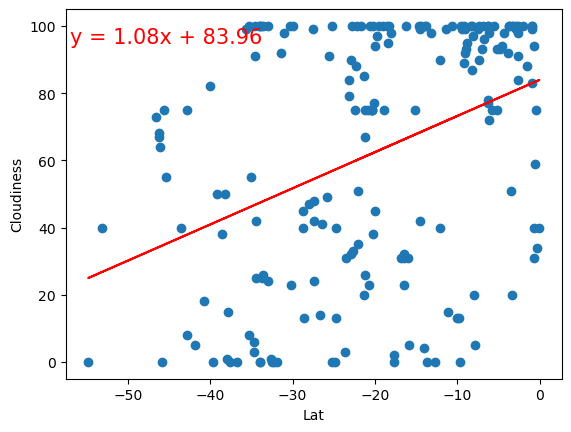

In [62]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness", (-57, 95))


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 The r-value is 0.014778747657254931


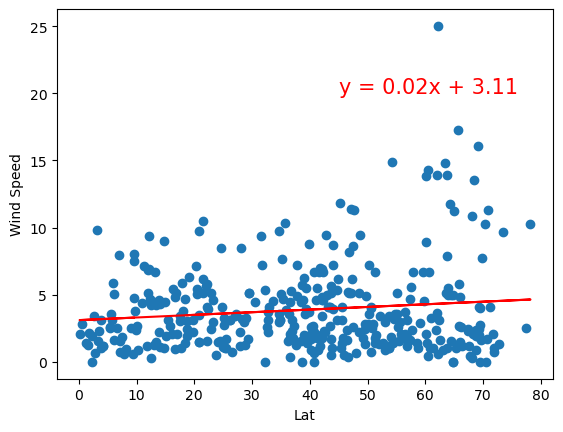

In [66]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (45, 20))

 The r-value is 0.09694460367477956


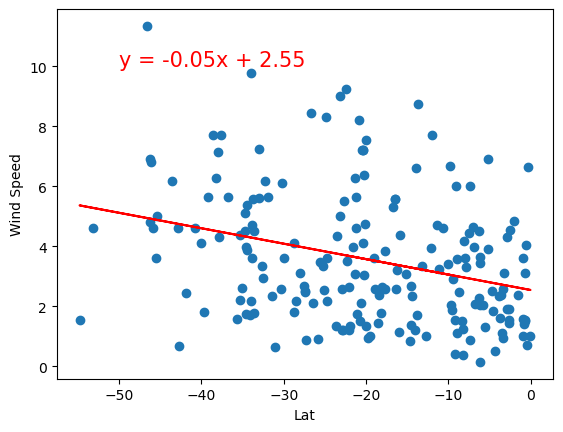

In [68]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed", (-50, 10))


**Discussion about the linear relationship:** YOUR RESPONSE HERE